![imagenes](logo.png)

# La aguja de Buffon
$\pi$ en Probabilidad

Se trata de lanzar una aguja sobre un papel en el que se han trazado rectas paralelas distanciadas entre sí de manera uniforme, y calcular la probabilidad de que la aguja atraviese una de esas rectas.

**Resultado Principal.** Si la distancia entre las rectas es igual a la longitud de la aguja, y se lanza la aguja $N$ veces acertando en $E$ de ellas, entonces 

$$\pi\sim\frac{2N}{E}$$

Vamos a ver lo anterior mediante una simulación en **R**.

*Consideraciones previas.* Suopngamos que la longitud de la aguja es 1, que es igual a la separación entre las rectas, y tomemos una hoja de ancho 10. Dejar caer la aguja en un punto de la hoja equivale a seleccionar un punto aleatorio $A=(x_0,y_0)$ y un ángulo $\theta\in[0,2\pi)$, de modo que los extremos de la aguja serán $A$ y $B=A+(\cos(\theta),\sin(\theta))$.

Entonces la aguja corta alguna de las rectas si existen $n\in\{0,1,2,...,10\}$ y $t\in[0,1]$ tales que $(tA+(1-t)B)_X=n$. Es decir, $x_0+(1-t)\cos(\theta)=n$.

De esta manera, debemos generar dos números: $x_0\sim U(0,10)$ y $\theta\in U(0,2\pi)$; luego, para cada entero $n\in\{0,1,2,...,10\}$, ver si la solución a $x_0+(1-t)\cos(\theta)=n$ está en $[0,1]$. Por lo tanto, $E$ es el número de veces que se cumple $$0\le \frac{n-x_0}{\cos(\theta)}\le1$$ cuando $n\in\{0,1,2,...,10\}$.

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

## Lanzamiento de 100 agujas y su gráfica

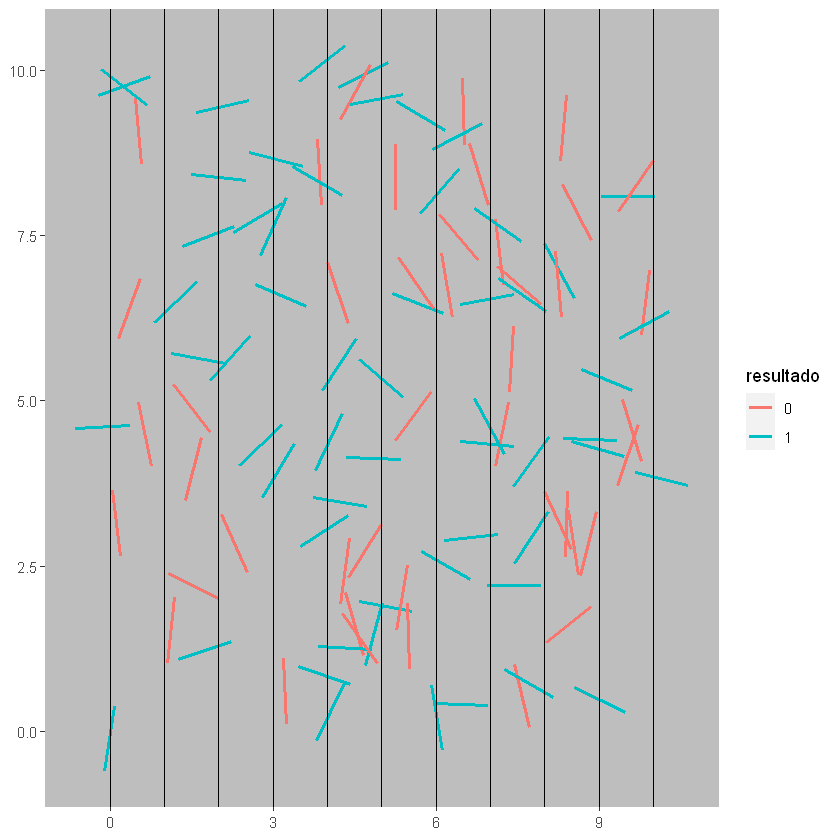

In [2]:
prueba = data.frame("x0"=runif(100,0,10),"y0"=runif(100,0,10),"theta"=runif(100,0,2*pi))
prueba =prueba %>% mutate(xf=x0+cos(theta),yf=y0+sin(theta))

M = sapply(0:10,function(x){auxiliar = data.frame(previo = (x-prueba$x0)/cos(prueba$theta))
                        auxiliar$exito=ifelse(auxiliar$previo>=0 & auxiliar$previo<=1,1,0)
                        names(auxiliar)[2] = paste0("exito_",x)
                        return(auxiliar[,2])})
prueba$resultado = as.factor(rowSums(M))


ggplot() +
    geom_segment(data=prueba,mapping=aes(x=x0,y=y0,xend=xf,yend=yf,color=resultado),size=1) +
    geom_vline(xintercept=0:10,color="black") +
    theme(
    panel.background = element_rect("gray"), 
    panel.grid = element_blank(),
    axis.title = element_blank()
    )

## Simulación 

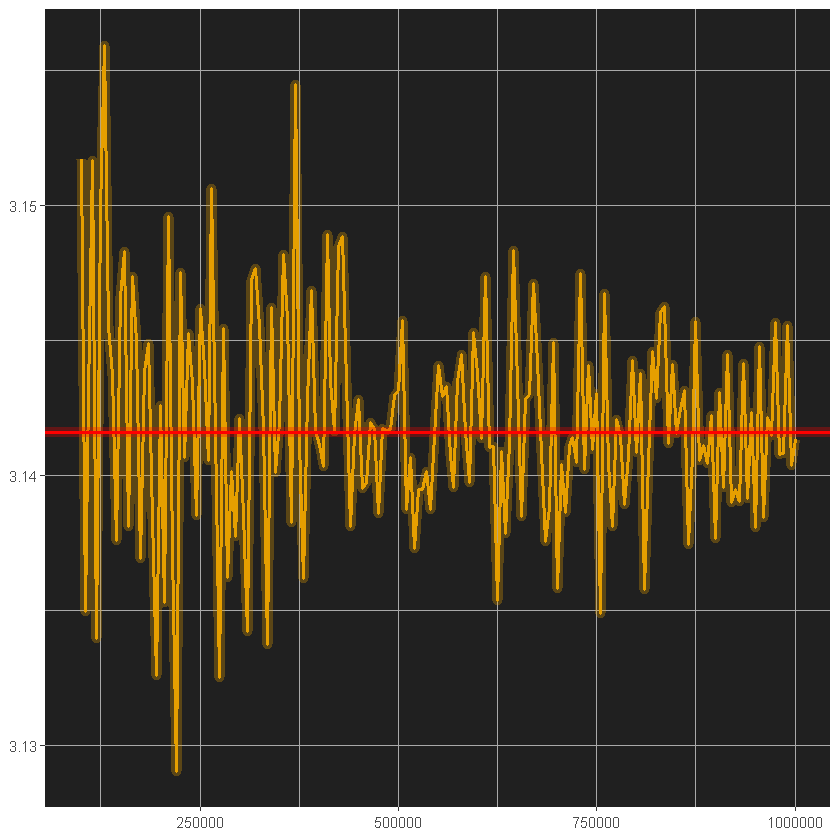

In [3]:
lanzamientos <- function(N){
    Intentos = data.frame("x0"=runif(N,0,10),"theta"=runif(N,0,2*pi))
    exitos = sapply(0:10,
          function(n){
              Intentos$resultado = (n-Intentos$x0)/cos(Intentos$theta)
              Intentos$resultado = ifelse(Intentos$resultado>=0 & Intentos$resultado<=1,1,0)
              return(sum(Intentos$resultado))
          })
    return(sum(exitos))
}

datos = data.frame("N"=seq(100000,1000000,5000))
datos$estimacion = sapply(datos$N,function(x){2*x/lanzamientos(x)})

ggplot() +
    geom_line(data = datos, mapping = aes(x=N,y=estimacion), size = 3, alpha=0.3, color="#E69F00") +
    geom_line(data = datos, mapping = aes(x=N,y=estimacion), size = 1, color="#E69F00") +
    geom_hline(yintercept = pi, size = 3, alpha=0.3, color="red") +
    geom_hline(yintercept = pi, size = 1, color="red") +
    theme(panel.background = element_rect("#202020"), 
    panel.grid = element_line(color="darkgrey",size=0.1),
    axis.title = element_blank())